1. 기본 통계 분석
1.1 어떤 항공기 모델이 가장 많은 충돌을 경험했는지 확인

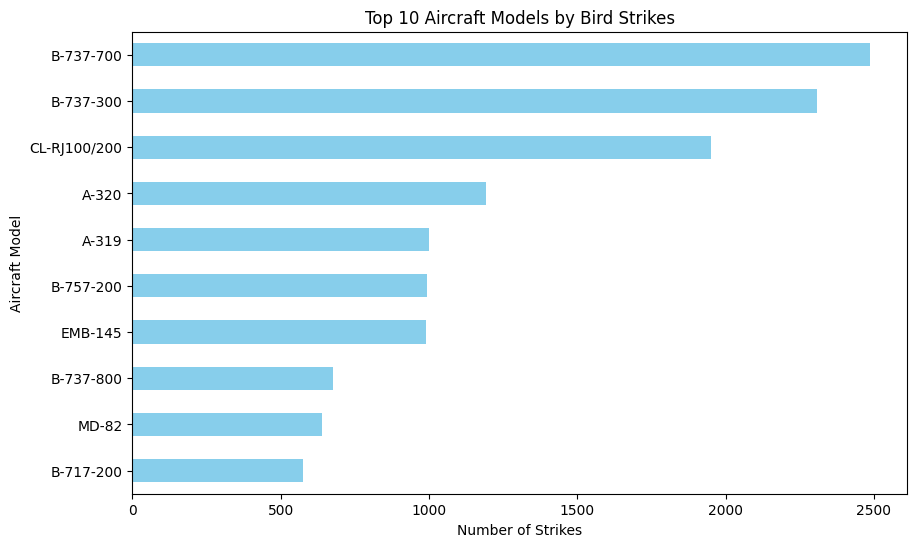

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the entire CSV
bird_strikes_full_data = pd.read_csv('bird_strikes.csv')

# Count the number of bird strikes by aircraft model
aircraft_strikes = bird_strikes_full_data['aircraft_make_model'].value_counts().head(10)

aircraft_strikes.plot(kind='barh', title='Top 10 Aircraft Models by Bird Strikes', color='skyblue', figsize=(10,6))
plt.xlabel('Number of Strikes')
plt.ylabel('Aircraft Model')
plt.gca().invert_yaxis()
plt.show()


1.2 가장 많이 충돌하는 야생동물의 종류 파악
이제 가장 많이 충돌하는 야생동물의 종류를 확인해보겠습니다.

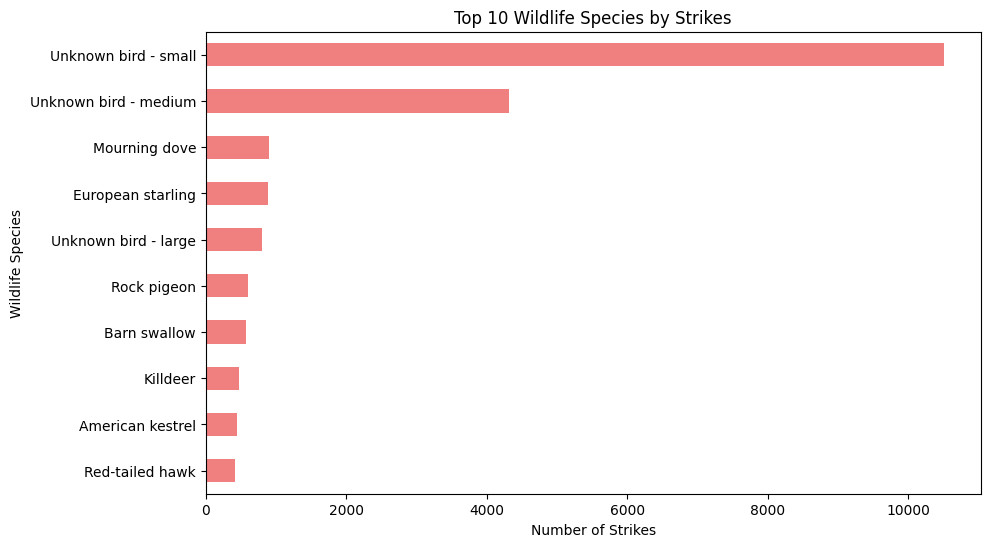

In [2]:
# Count the number of bird strikes by wildlife species
wildlife_strikes = bird_strikes_full_data['wildlife_species'].value_counts().head(10)

wildlife_strikes.plot(kind='barh', title='Top 10 Wildlife Species by Strikes', color='lightcoral', figsize=(10,6))
plt.xlabel('Number of Strikes')
plt.ylabel('Wildlife Species')
plt.gca().invert_yaxis()
plt.show()


1.3 충돌로 인한 평균 비용 계산
이제 충돌로 인한 평균 비용을 계산해보겠습니다.

In [3]:
# Calculate the average cost due to bird strikes
average_cost = bird_strikes_full_data['cost_total'].mean()

average_cost

5567.354448704907

2. 시간대별 분석
2.1 연도별 충돌 발생 횟수 추이 확인
먼저, 연도별로 새와의 충돌 발생 횟수를 확인하겠습니다.

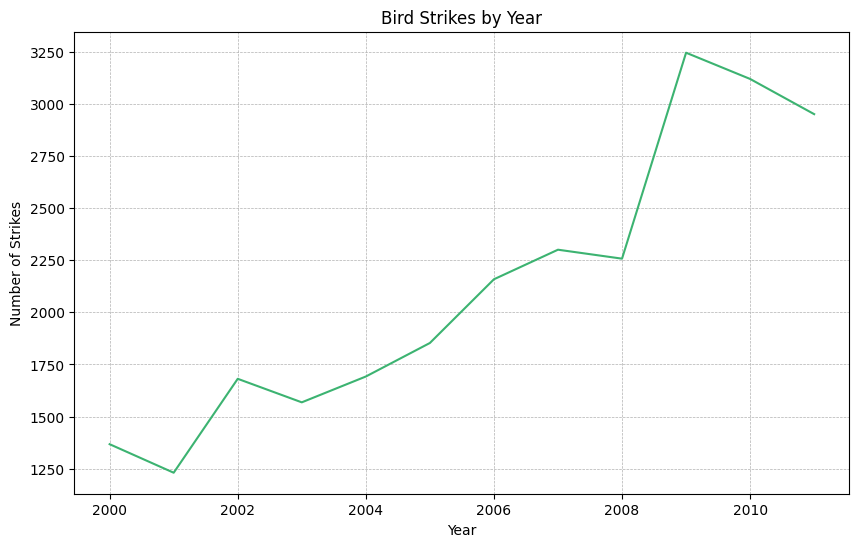

In [4]:
# Extract the year from the flightdate and create a new column
bird_strikes_full_data['year'] = pd.to_datetime(bird_strikes_full_data['flightdate']).dt.year

# Count the number of bird strikes by year
yearly_strikes = bird_strikes_full_data['year'].value_counts().sort_index()

yearly_strikes.plot(kind='line', title='Bird Strikes by Year', color='mediumseagreen', figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Number of Strikes')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


3. 공항별 분석
3.1 어떤 공항에서 가장 많은 충돌 사고가 발생했는지 확인
이제 가장 많은 새 충돌 사고가 발생한 상위 10개의 공항을 확인해보겠습니다.

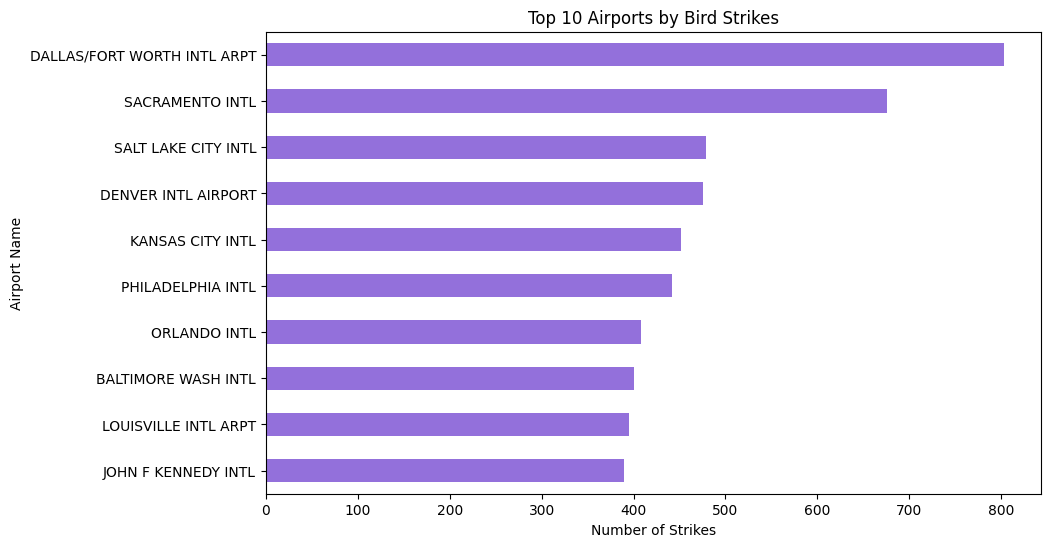

In [5]:
# Count the number of bird strikes by airport
airport_strikes = bird_strikes_full_data['airport_name'].value_counts().head(10)

airport_strikes.plot(kind='barh', title='Top 10 Airports by Bird Strikes', color='mediumpurple', figsize=(10,6))
plt.xlabel('Number of Strikes')
plt.ylabel('Airport Name')
plt.gca().invert_yaxis()
plt.show()


4. 손상 및 비용 분석
4.1 야생동물의 크기나 종류에 따른 평균 손상 비용 파악
먼저, 야생동물의 크기에 따른 평균 손상 비용을 확인해보겠습니다.

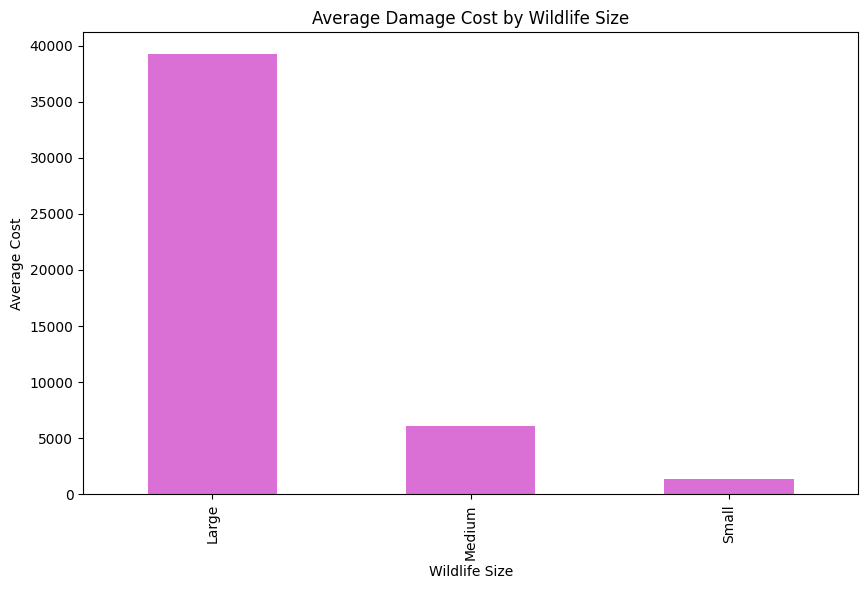

In [6]:
# Calculate the average cost of bird strikes by wildlife size
average_cost_by_size = bird_strikes_full_data.groupby('wildlife_size')['cost_total'].mean()

average_cost_by_size.plot(kind='bar', title='Average Damage Cost by Wildlife Size', color='orchid', figsize=(10,6))
plt.ylabel('Average Cost')
plt.xlabel('Wildlife Size')
plt.show()


4.2 항공기의 크기와 충돌로 인한 평균 손상 비용 간의 관계 분석
이제 항공기의 크기와 충돌로 인한 평균 손상 비용 간의 관계를 확인해보겠습니다.

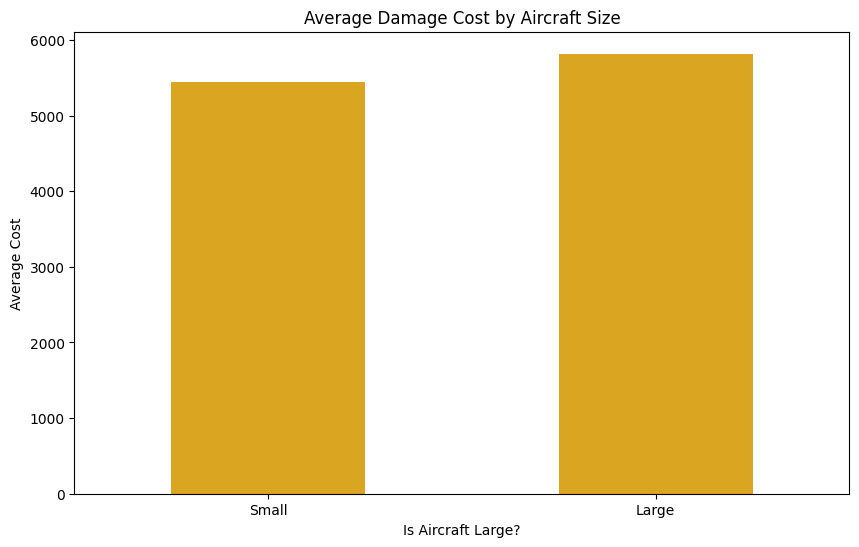

In [7]:
# Calculate the average cost of bird strikes by aircraft size
average_cost_by_aircraft_size = bird_strikes_full_data.groupby('is_aircraft_large')['cost_total'].mean()

average_cost_by_aircraft_size.plot(kind='bar', title='Average Damage Cost by Aircraft Size', color='goldenrod', figsize=(10,6))
plt.ylabel('Average Cost')
plt.xlabel('Is Aircraft Large?')
plt.xticks([0, 1], ['Small', 'Large'], rotation=0)
plt.show()


5. 충돌에 대한 경고 분석
5.1 조종사가 야생동물 충돌 위험에 대해 경고받았을 때와 받지 않았을 때의 충돌 발생률 비교
조종사가 야생동물 충돌 위험에 대해 경고받았을 때와 받지 않았을 때의 충돌 발생률을 비교해보겠습니다.

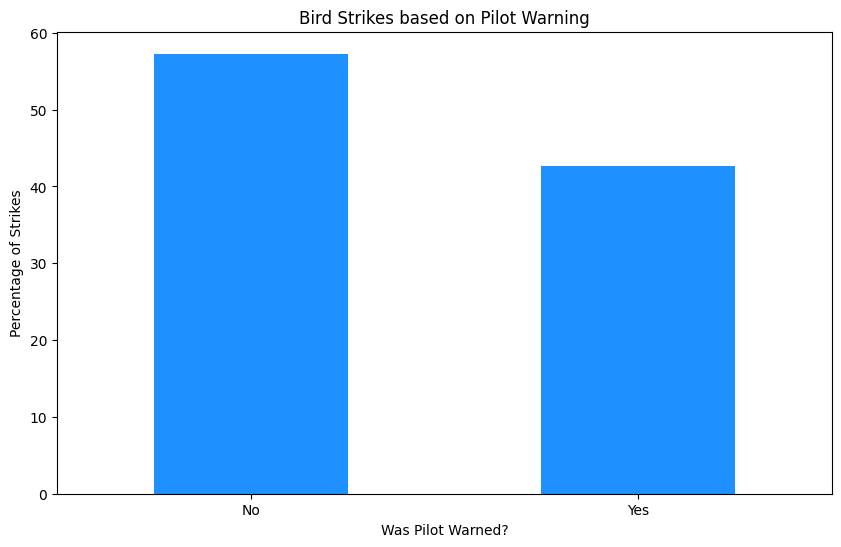

In [8]:
# Count the number of bird strikes based on whether the pilot was warned or not
warned_strikes = bird_strikes_full_data['pilot_warned_of_birds_or_wildlife'].value_counts(normalize=True) * 100

warned_strikes.plot(kind='bar', title='Bird Strikes based on Pilot Warning', color='dodgerblue', figsize=(10,6))
plt.ylabel('Percentage of Strikes')
plt.xlabel('Was Pilot Warned?')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()


6. 고도별 충돌 분석
6.1 특정 고도에서의 충돌 발생률이 높은지 분석
이제 항공기의 고도와 새 충돌 발생률 간의 관계를 확인해보겠습니다.

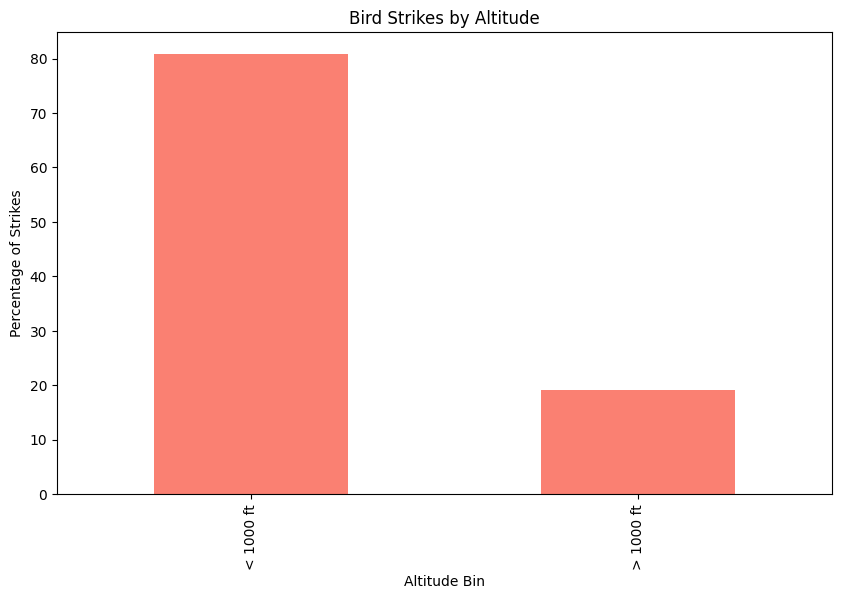

In [9]:
# Count the number of bird strikes by altitude bin
altitude_strikes = bird_strikes_full_data['altitude_bin'].value_counts(normalize=True) * 100

altitude_strikes.plot(kind='bar', title='Bird Strikes by Altitude', color='salmon', figsize=(10,6))
plt.ylabel('Percentage of Strikes')
plt.xlabel('Altitude Bin')
plt.show()
